In [12]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Importing the dataset
d = pd.read_csv('regression_data.csv')
print(d[:10])
x = d.iloc[:, :-1].values
y = d.iloc[:, -1].values

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0


In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [15]:
def getInputs(x,y):
    #dims of theta : (no_of_variable+1,1)
    #dims of x : (m,no_of_variable)
    #dims of y : (m,1)
    #initilizing theta
    theta=np.zeros(shape=(x.shape[1]+1,1))
    #horizontal stacking of x with ones for evaluation of theta0
    ones=np.ones(shape=(x.shape[0],1))
    x=np.hstack((ones,x))
    #new dims of x : (m,no_of_variable+1)
    #reshaping y:
    y=y.reshape((y.shape[0],1))
    return x,y,theta

In [16]:
#hypothesis function
def h(x,theta):
    #h(x)=x.theta
    return np.dot(x,theta)

In [17]:
#gradient descent function
def gradientDescent(x,y,alpha=0.02):
    x,y,theta=getInputs(x,y)
    print(theta.shape)
    #taking 1000 iterations for convergence
    for i in range(1000):
        theta=theta-alpha*(1/x.shape[0])*np.sum((h(x,theta)-y)*x,axis=0).reshape((theta.shape[0],1))
    return(theta)

In [18]:
theta=gradientDescent(x_train,y_train,alpha=0.05)

(2, 1)


In [19]:
def predict(x,theta):
    #horizontal stacking of x with ones for evaluation of theta0
    tx=x
    ones=np.ones(shape=(x.shape[0],1))
    x=np.hstack((ones,x))
    out=h(x,theta)
    return out

In [20]:
predict(x_test,theta)

array([[ 40834.76175602],
       [123079.72261049],
       [ 65134.4092812 ],
       [ 63265.20562542],
       [115602.90798735],
       [108126.09336422],
       [116537.50981524],
       [ 64199.80745331],
       [ 76349.6312159 ],
       [100649.27874109]])

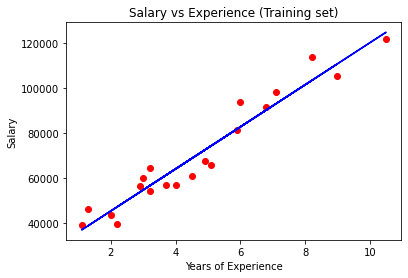

In [21]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, predict(x_train,theta), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

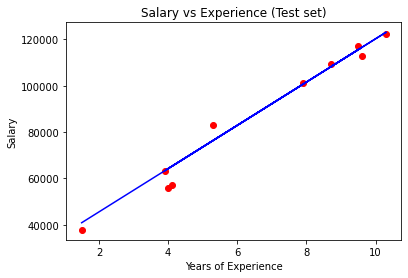

In [23]:
# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, predict(x_test,theta), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()